In [1]:
from planetengine import quickShow
from planetengine import systems
from planetengine.initials.sinusoidal import Sinusoidal

In [2]:
system = systems.isovisc(res = 16, alpha = 1e5, f = 0.5, aspect = 'max', temperatureField = Sinusoidal(freq = 6., phase = 0.25))


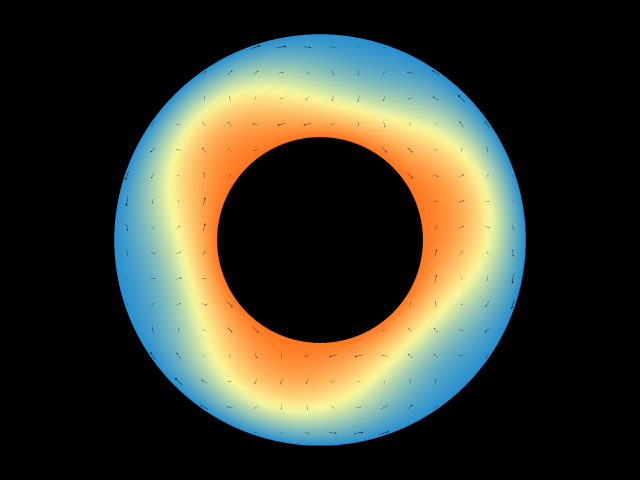

In [4]:
# quickShow(system.locals.temperatureField, system.locals.temperatureField, system.locals.velocityField)
quickShow(system.locals.temperatureField, system.locals.velocityField)

In [5]:
from planetengine.functions import gradient, component

In [6]:
vel = system.locals.vc
udy = gradient.y(component.x(vel))
vdx = gradient.x(component.y(vel))


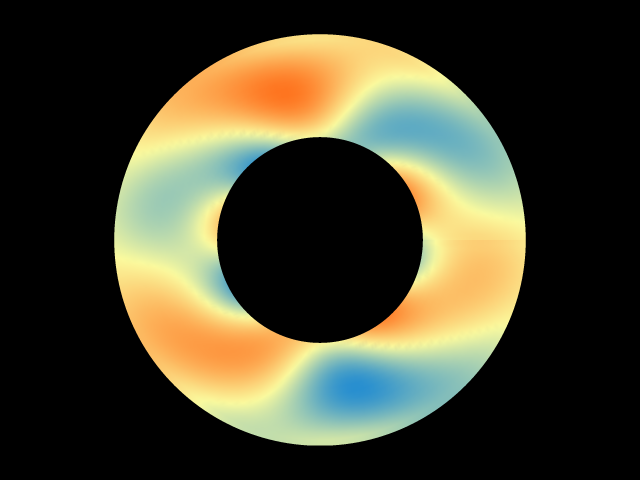

In [7]:
quickShow(udy)


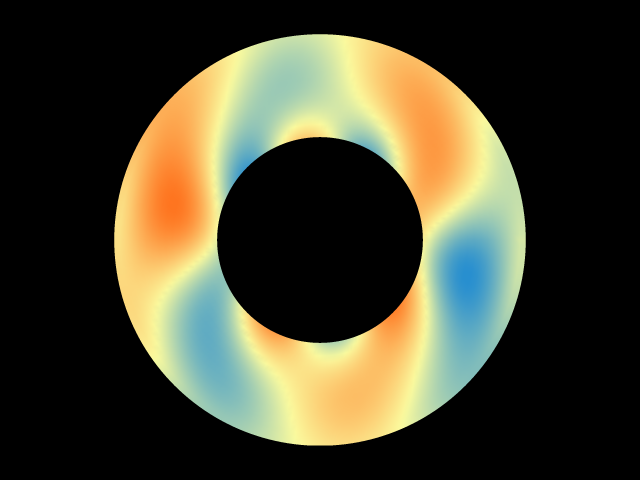

In [8]:
quickShow(vdx)


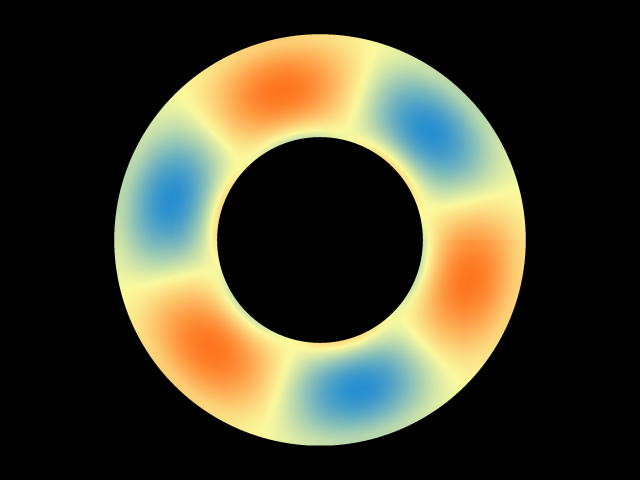

In [9]:
quickShow(udy - vdx)

In [10]:
import underworld as uw
fn, cd = uw.function, uw.conditions

In [11]:
psiField = system.locals.mesh.add_variable(1)
# psiWalls = system.locals.inner + system.locals.outer + system.locals.left + system.locals.right
psiWalls = system.locals.inner + system.locals.outer
# psiWalls = system.locals.inner
psiBC = cd.DirichletCondition(psiField, psiWalls)
psiBCs = [psiBC,]
psiField.data[:] = 0.

In [12]:
# psiSystem = uw.systems.SteadyStateHeat(
#     temperatureField = psiField,
#     fn_diffusivity = 1.,
#     fn_heating = udy - vdx,
#     conditions = psiBCs
#     )
psiSystem = uw.systems.SteadyStateHeat(
    temperatureField = psiField,
    fn_diffusivity = 1.,
    fn_heating = udy - vdx,
    conditions = psiBCs
    )
psiSolver = uw.systems.Solver(psiSystem)
psiSolver.solve()


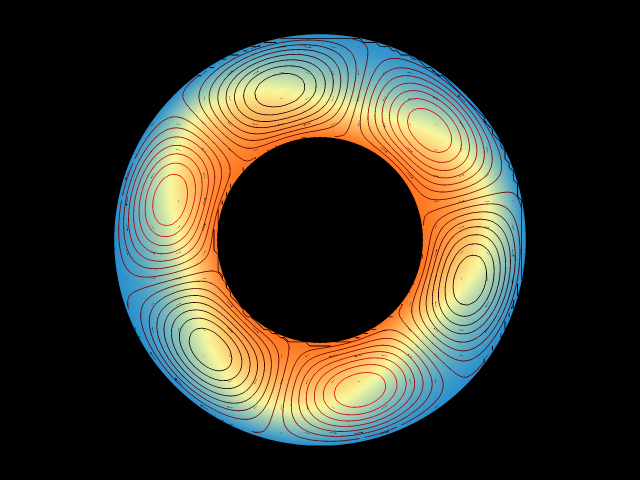

In [13]:
psiSolver.solve()
quickShow(system.locals.temperatureField, psiField, system.locals.velocityField)

In [14]:
system.iterate(100)
psiSolver.solve()


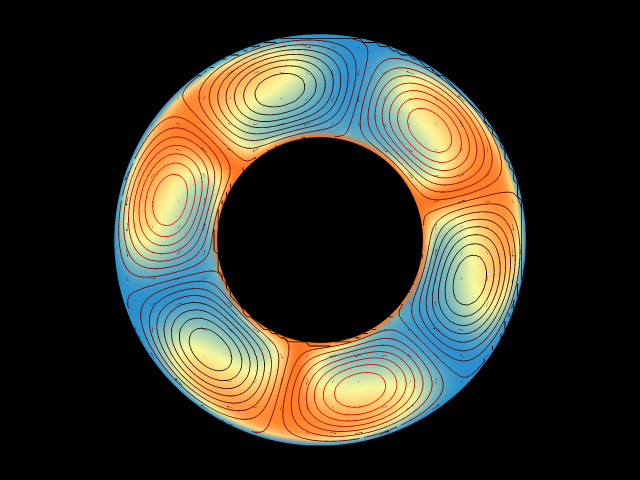

In [15]:
quickShow(system.locals.temperatureField, psiField, system.locals.velocityField)

In [ ]:
from planetengine.functions import getstat

In [ ]:
getstat.ranges(psiField).evaluate()

In [ ]:
import glucifer

In [ ]:
help(glucifer.objects.Contours)